# Parte 1: DCCasas

Nota de los ayudantes: Por motivos de desempeño de las redes neuronales, recomendamos realizar esta tarea en Google Colab.

### Importando los datos

In [19]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from datetime import datetime
from scipy.sparse import csr_matrix

In [20]:
# Creamos una semilla para que los resultados sean replicables
n_alumno = None
np.random.seed(n_alumno)

In [3]:
# Mediante las siguientes líneas podrás descargar la base de datos en la carpeta multimodal_house_prices/ si utilizas google colab, en caso contrario descárgala directamente desde el link
!gdown https://drive.google.com/uc?id=1078WtQHBTCe5amlDtfu3bgPbO9PFd31R
!unzip --qq multimodal_house_prices.zip

zsh:1: no matches found: https://drive.google.com/uc?id=1078WtQHBTCe5amlDtfu3bgPbO9PFd31R
unzip:  cannot find or open multimodal_house_prices.zip, multimodal_house_prices.zip.zip or multimodal_house_prices.zip.ZIP.


In [21]:
path = '../multimodal_house_prices/'   # Si corres el notebook a nivel local
#path = '/content/multimodal_house_prices/'   # Si corres el notebook en google colab

# Importamos el csv
meta_data = pd.read_csv(path + "data.csv")

# Veamos las primeras 5 observaciones
meta_data.head()

,image_id,street,city,bedrooms,bathrooms,sqft,price
0,1,124 C Street W,"Brawley, CA",3,2.0,713,228500
1,4,2207 R Carrillo Court,"Calexico, CA",4,3.0,2547,385100
2,6,1100 CAMILIA Street,"Calexico, CA",4,3.0,2769,415000
3,7,803 Chaparral Court,"Brawley, CA",5,2.1,2600,545000
4,8,803 Chaparral Court,"Brawley, CA",5,2.1,2600,545000


In [22]:
# Preparación de datos para el MLP
X_mlp = meta_data.drop(['price', 'image_id'], axis=1)

# Definir la variable objetivo
y = np.array(meta_data["price"].tolist())

# Función para extraer características de una imagen
def image_processing(file):
    image = cv2.imread(file)

    # Obtén las dimensiones de la imagen
    height, width = image.shape[:2]

    # Verifica si la imagen ya tiene las dimensiones deseadas
    if height == 311 and width == 415:
        return image
    else:
        # Redimensiona la imagen a 415x311 con interpolación lineal
        resized_image = cv2.resize(image, (415, 311), interpolation=cv2.INTER_LINEAR)
        return resized_image
    return image

# Lista vacía para guardar los datos procesados
extracted_cnn = []

# Iterar sobre cada fila del DataFrame
for index_num, row in tqdm(meta_data.iterrows()):
    # Obtener el path de la imagen
    file_name = os.path.join(os.path.abspath(path), 'images/' +  str(row['image_id']) + '.jpg')

    # Obtener el valor objetivo (por ejemplo, el precio)
    target_value = row['price']

    # Usar la función definida arriba para procesar la imagen
    data = image_processing(file_name)

    # Guardar la imagen redimensionada
    extracted_cnn.append(data)

# Definir los datos para la CNN
X_cnn = np.array(extracted_cnn)

12518it [00:13, 940.10it/s] 


In [ ]:
X_mlp.shape


In [ ]:
X_mlp.head()

In [ ]:
y.shape

In [ ]:
meta_data.describe()

### Actividad 1: Importando y comprendiendo los datos

* Investiga y describe por qué el preprocesamiento es una etapa crucial para las redes neuronales. Explica cómo los pasos de preprocesamiento pueden afectar el rendimiento de un modelo.

* Si tuviéramos pocas imágenes para entrenar un modelo, ¿qué técnicas podrías usar para enriquecer el conjunto de datos? Investiga sobre el aumento de datos en imágenes.

### Actividad 2: Explorando los Multilayer Perceptron (MLP)

* Discute cómo la profundidad y el ancho (número de capas y neuronas por capa) de un MLP afectan su capacidad para aprender patrones complejos. ¿Cuáles son los desafíos relacionados con el aumento de la complejidad del modelo?

* Investiga y compara al menos dos funciones de activación no lineales diferentes utilizadas en MLPs. ¿Cómo afectan estas funciones al tipo de decisiones que puede aprender la red? Considera aspectos como la saturación y la no linealidad.

* Examina las causas y síntomas del overfitting en MLP. ¿Qué técnicas se pueden aplicar para prevenir este problema y cómo afectan el proceso de aprendizaje?

* Más allá del SGD (Stochastic Gradient Descent) y Adam, investiga sobre otro método de optimización utilizado en el entrenamiento de MLP. ¿Cuáles son sus características únicas y en qué situaciones podría ser preferible?

* Identifica y analiza un estudio de caso donde se haya utilizado un MLP para resolver un problema real. ¿Qué características del problema hicieron que un MLP fuera una buena elección y cómo se diseñó la arquitectura de la red para adaptarse a las necesidades específicas del problema?

### Implementación de un Multilayer Perceptron (MLP)

* Implementa un MLP con al menos dos capas ocultas. Entrena tu modelo en el conjunto de datos de entrenamiento y realiza ajustes en los hiperparámetros (como la tasa de aprendizaje, número de neuronas, funciones de activación) para mejorar el rendimiento del modelo.

Iteration 1, loss = 301355363669.54223633
Iteration 2, loss = 301094903371.80883789
Iteration 3, loss = 299567926684.81738281
Iteration 4, loss = 294408644477.67913818
Iteration 5, loss = 282404118934.97241211
Iteration 6, loss = 260428975311.35394287
Iteration 7, loss = 227109706480.78402710
Iteration 8, loss = 184745992917.32696533
Iteration 9, loss = 140757504911.33523560
Iteration 10, loss = 104913069158.93115234
Iteration 11, loss = 83800524939.25114441
Iteration 12, loss = 74392973853.72279358
Iteration 13, loss = 69519435264.46987915
Iteration 14, loss = 66307601059.76612854
Iteration 15, loss = 63707477050.18682098
Iteration 16, loss = 61397972204.14167023
Iteration 17, loss = 59354289590.77073669
Iteration 18, loss = 57468000048.48160553
Iteration 19, loss = 55717068901.68886566
Iteration 20, loss = 54195576010.73459625
Iteration 21, loss = 52722050676.65372467
Iteration 22, loss = 51356310397.86020660
Iteration 23, loss = 50139049095.67195892
Iteration 24, loss = 48998879869.

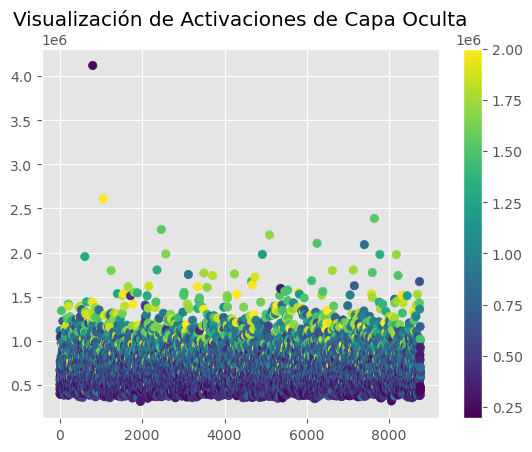

In [84]:
# código en base a clase 09 - MLP
import warnings
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler

label_encoders = {}
for column in X_mlp.columns:
    if X_mlp[column].dtype == 'object':
        le = LabelEncoder()
        X_mlp[column] = le.fit_transform(X_mlp[column])
        label_encoders[column] = le


# Split data into train partition and test partition
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y, random_state=0, test_size=0.7)
scaler = StandardScaler()
X_train_mlp = scaler.fit_transform(X_train_mlp)
X_test_mlp = scaler.transform(X_test_mlp)


mlp = MLPRegressor(
    hidden_layer_sizes=(4, 4),
    max_iter=1000,
    alpha=0.00001,
    solver="adam",
    activation="relu",
    verbose=10,
    random_state=2,
    learning_rate_init=0.1,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train_mlp, y_train_mlp)

print("Training set score: %f" % mlp.score(X_train_mlp, y_train_mlp))
print("Test set score: %f" % mlp.score(X_test_mlp, y_test_mlp))

# Obtener las activaciones de la capa oculta utilizando predict
hidden_layer_activations = mlp.predict(X_test_mlp)

plt.scatter(range(len(hidden_layer_activations)), hidden_layer_activations, c=y_test_mlp, cmap='viridis')
plt.colorbar()
plt.title('Visualización de Activaciones de Capa Oculta')
plt.show()



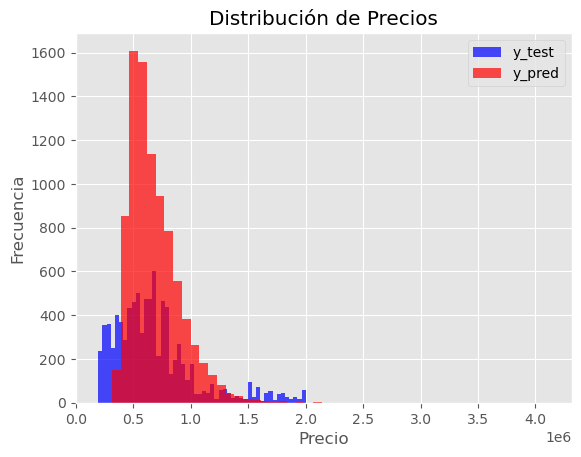

Media y_test: 685787.38
Mediana y_test: 620000.00
Desviación Estándar y_test: 364685.13
Media y_pred: 665860.88
Mediana y_pred: 678629.19
Desviación Estándar y_pred: 87807.57


In [96]:
plt.hist(y_test_mlp, bins=50, color='blue', alpha=0.7, label='y_test')



plt.hist(y_pred_mlp, bins=50, color="red", alpha=0.7, label='y_pred')


plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')


plt.legend()

plt.show()

media_precio = np.mean(y_test_mlp)
mediana_precio = np.median(y_test_mlp)
std_precio = np.std(y_test_mlp)

print(f'Media y_test: {media_precio:.2f}')
print(f'Mediana y_test: {mediana_precio:.2f}')
print(f'Desviación Estándar y_test: {std_precio:.2f}')


media_precio_pred_mlp = np.mean(y_pred_mlp)
mediana_precio_pred_mlp = np.median(y_pred_mlp)
std_precio_pred_mlp = np.std(y_pred_mlp)

print(f'Media y_pred: {media_precio_pred:.2f}')
print(f'Mediana y_pred: {mediana_precio_pred:.2f}')
print(f'Desviación Estándar y_pred: {std_precio_pred:.2f}')


In [8]:
meta_data.loc[2832, ]

image_id           3300
street       107 Ritual
city         Irvine, CA
bedrooms              4
bathrooms           4.1
sqft               3047
price           1521967
Name: 2832, dtype: object

In [66]:
X_mlp.loc[2832, ]

street        297.0
city          153.0
bedrooms        4.0
bathrooms       4.1
sqft         3047.0
Name: 2832, dtype: float64

In [12]:
y_train

array([1521967,  449000,  699000, ...,  565900, 1434000, 1019000])

* Evalúa el rendimiento de tu modelo en el conjunto de datos de prueba. Utiliza métricas relevantes para problemas de regresión, como el error cuadrático medio (MSE).

In [86]:
# en base a documentación
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


y_pred_mlp = mlp.predict(X_test_mlp)

mse = mean_squared_error(y_test_mlp, y_pred_mlp)
r2 = r2_score(y_test_mlp, y_pred_mlp)
mae = mean_absolute_error(y_test_mlp, y_pred_mlp)

print("Mean Squared Error (MSE): %f" % mse)
print("R^2 Score: %f" % r2)
print("Mean Absolute Error (MAE): %f" % mae)

mape = np.mean(np.abs((y_test_mlp - y_pred_mlp) / y_test_mlp)) * 100

print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)


Mean Squared Error (MSE): 86816002020.927460
R^2 Score: 0.347225
Mean Absolute Error (MAE): 216567.291456
Mean Absolute Percentage Error (MAPE): 37.798526%


In [87]:
print("Accuracy", 100-mape)

Accuracy 62.20147386573775


*  Realiza al menos dos experimentos variando la arquitectura del MLP o los hiperparámetros. Describe cómo cada cambio afecta el rendimiento del modelo y discute tus hallazgos.

# Experimento 1: learning_Rate change


Iteration 1, loss = 301284413328.51116943
Iteration 2, loss = 299204856168.93682861
Iteration 3, loss = 284240193885.51049805
Iteration 4, loss = 234753587983.52081299
Iteration 5, loss = 159293937919.47897339
Iteration 6, loss = 119856577138.94824219
Iteration 7, loss = 99983982210.94743347
Iteration 8, loss = 78703063075.51596069
Iteration 9, loss = 63407334192.44829559
Iteration 10, loss = 55166094281.39705658
Iteration 11, loss = 50885485751.73590088
Iteration 12, loss = 47795203834.27651978
Iteration 13, loss = 45694409123.50344849
Iteration 14, loss = 44403499470.67549133
Iteration 15, loss = 43594210333.08883667
Iteration 16, loss = 43166032644.55643463
Iteration 17, loss = 42957600553.94274902
Iteration 18, loss = 42769776255.97064209
Iteration 19, loss = 42620143523.61580658
Iteration 20, loss = 42655794712.62964630
Iteration 21, loss = 42529532349.11935425
Iteration 22, loss = 42480924293.52886200
Iteration 23, loss = 42428244033.70703888
Iteration 24, loss = 42408884263.7089

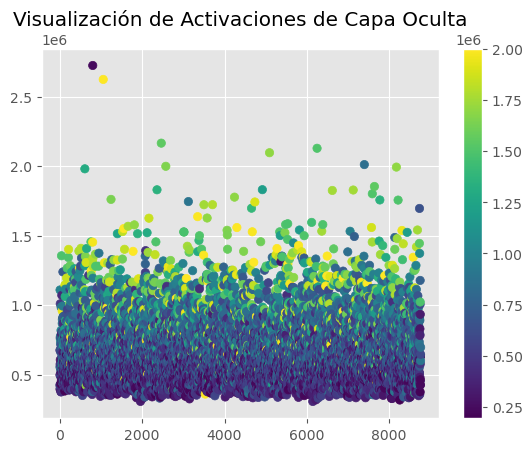

In [149]:

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y, random_state=0, test_size=0.7)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPRegressor(
    hidden_layer_sizes=(4, 4),
    max_iter=1000,
    alpha=0.00001,
    solver="adam",
    activation="relu",
    verbose=10,
    random_state=2,
    learning_rate_init=0.2,

)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# Obtener las activaciones de la capa oculta utilizando predict
hidden_layer_activations = mlp.predict(X_test)

plt.scatter(range(len(hidden_layer_activations)), hidden_layer_activations, c=y_test, cmap='viridis')
plt.colorbar()
plt.title('Visualización de Activaciones de Capa Oculta')
plt.show()


In [150]:
# en base a documentación
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE): %f" % mse)
print("R^2 Score: %f" % r2)
print("Mean Absolute Error (MAE): %f" % mae)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)

Mean Squared Error (MSE): 85387519463.787888
R^2 Score: 0.357966
Mean Absolute Error (MAE): 216030.249979
Mean Absolute Percentage Error (MAPE): 37.410590%


## aumento de cantidad de neuronas y capas

Iteration 1, loss = 298742392271.03057861
Iteration 2, loss = 188233925165.31814575
Iteration 3, loss = 69890722400.76965332
Iteration 4, loss = 50542124424.14543152
Iteration 5, loss = 45187206213.17366028
Iteration 6, loss = 43264336263.32526398
Iteration 7, loss = 42913468868.21050262
Iteration 8, loss = 42431530317.07740021
Iteration 9, loss = 42462300479.36862183
Iteration 10, loss = 42777111397.48891449
Iteration 11, loss = 42392023050.83233643
Iteration 12, loss = 42298796493.78529358
Iteration 13, loss = 42254261545.84065247
Iteration 14, loss = 42186651173.80811310
Iteration 15, loss = 42594030580.80244446
Iteration 16, loss = 42658202230.89000702
Iteration 17, loss = 42240544584.29357147
Iteration 18, loss = 42741668610.05072784
Iteration 19, loss = 42238130549.41770935
Iteration 20, loss = 42209762079.18114471
Iteration 21, loss = 42309181810.43363190
Iteration 22, loss = 42337046024.02005768
Iteration 23, loss = 42373001575.04598236
Iteration 24, loss = 42217940815.92848206

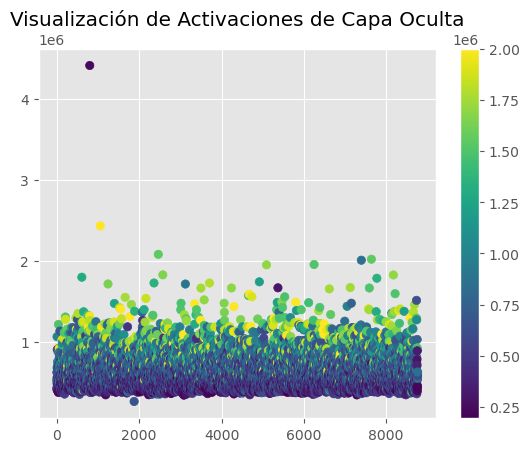

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y, random_state=0, test_size=0.7)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPRegressor(
    hidden_layer_sizes=(8, 8, 8),
    max_iter=1000,
    alpha=0.00001,
    solver="adam",
    activation="relu",
    verbose=10,
    random_state=2,
    learning_rate_init=0.2,

)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# Obtener las activaciones de la capa oculta utilizando predict
hidden_layer_activations = mlp.predict(X_test)

plt.scatter(range(len(hidden_layer_activations)), hidden_layer_activations, c=y_test, cmap='viridis')
plt.colorbar()
plt.title('Visualización de Activaciones de Capa Oculta')
plt.show()



In [178]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score


y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE): %f" % mse)
print("R^2 Score: %f" % r2)
print("Mean Absolute Error (MAE): %f" % mae)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)

#código de ayudantía
#Converting predictions to label

a = accuracy_score(pred,test)*100
print("Accuracy Score: ", a )

Mean Squared Error (MSE): 90336692045.026474
R^2 Score: 0.320752
Mean Absolute Error (MAE): 213915.308712
Mean Absolute Percentage Error (MAPE): 34.799276%


Iteration 1, loss = 301355363669.54223633
Iteration 2, loss = 301094903371.80883789
Iteration 3, loss = 299567926684.81738281
Iteration 4, loss = 294408644477.67913818
Iteration 5, loss = 282404118934.97241211
Iteration 6, loss = 260428975311.35394287
Iteration 7, loss = 227109706480.78402710
Iteration 8, loss = 184745992917.32696533
Iteration 9, loss = 140757504911.33523560
Iteration 10, loss = 104913069158.93115234
Iteration 11, loss = 83800524939.25114441
Iteration 12, loss = 74392973853.72279358
Iteration 13, loss = 69519435264.46987915
Iteration 14, loss = 66307601059.76612854
Iteration 15, loss = 63707477050.18682098
Iteration 16, loss = 61397972204.14167023
Iteration 17, loss = 59354289590.77073669
Iteration 18, loss = 57468000048.48160553
Iteration 19, loss = 55717068901.68886566
Iteration 20, loss = 54195576010.73459625
Iteration 21, loss = 52722050676.65372467
Iteration 22, loss = 51356310397.86020660
Iteration 23, loss = 50139049095.67195892
Iteration 24, loss = 48998879869.

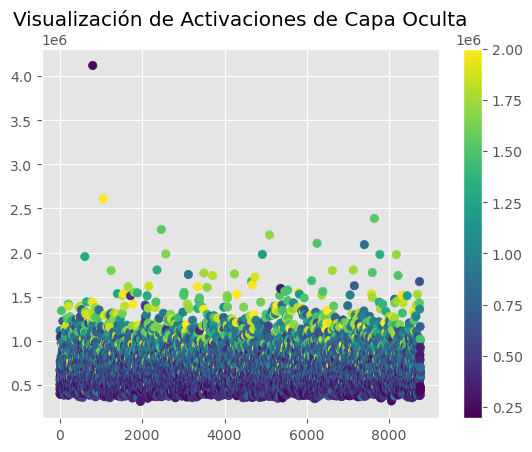

In [31]:
from tensorflow.keras.models import Sequential
# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y, random_state=0, test_size=0.7)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp_seq = Sequential([
    Flatten(input_shape = [5]),
    Dense(4, activation = "relu"),
    Dense(4, activation = "relu"),
])


# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# Obtener las activaciones de la capa oculta utilizando predict
hidden_layer_activations = mlp.predict(X_test)

plt.scatter(range(len(hidden_layer_activations)), hidden_layer_activations, c=y_test, cmap='viridis')
plt.colorbar()
plt.title('Visualización de Activaciones de Capa Oculta')
plt.show()

* Basado en tus resultados, ¿cuáles son las características más importantes de un MLP para la predicción precisa en este conjunto de datos? ¿Cómo relacionas esto con la teoría aprendida?

* Describe los desafíos que encontraste al implementar y entrenar el MLP. ¿Cómo los superaste y qué aprendiste en el proceso? ¿en qué otros tipos de problemas crees que un MLP podría ser efectivo?

### Introducción y teoría de las CNN's

* ¿Qué es una operación convolucional? ¿Qué es un *kernel*? Utiliza estos conceptos para explicar el rol de las capas convolucionales en una CNN.

* ¿Cuál es el rol de las funciones de activación? ¿Y de las capas de *Max Pooling*?

* Quizás habrás notado que la mayoría de arquitecturas de CNN's utilizan una última capa conocida como *flatten layer*. ¿Cúal es su función? ¿Cuál es el rol de la función *softmax* en ella?

¿Cuáles son las ventajas y desventajas de las CNN's frente a las MLP's? ¿Para qué tipo de tareas suele ser útil utilizar CNN's?

### Creando y evaluando una CNN


Para entrenar nuestra red neuronal, utilizaremos la librería de [`TensorFlow`](https://www.tensorflow.org/api_docs/python/tf/all_symbols), podemos instalar esta librería mediante la línea `pip install tensorflow`.

TensorFlow es una librería desarrollada por Google que nos permite construir, entrenar e implementar modelos de aprendizaje profundo en Python.

Para esto, TensorFlow nos permite armar una red en forma de "capas", [en el siguiente link encontrarás un tutorial más en detalle de cómo crear un modelo de TensorFlow](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5). Deberemos introducir todas las capas de nuestra red dentro de un objeto `tf.keras.Sequential()`, que recibe de parámetro una lista con todos los elementos de nuestra red.

<br>

A continuación se enumeran los tres principales elementos que utilizaremos en nuestro modelo:
- `tf.keras.Input(shape = a)`: La capa de entrada de la red, es la primera que recibe. Necesita de un parámetro `shape` que determinará la dimensionalidad del vector de entrada, esto será entregado en una tupla `a` (ej. `(5, 2)`).

- `tf.keras.layers.Dense(units = b, activation = 'relu')`: Corresponde a una capa intermedia de la red del tipo *Fully Connected*, le entregaremos un parámetro `units` que determinará cuántas unidades ocultas (neuronas) tendrá la capa (y por tanto, el número de componentes en el vector de salida de la capa, en este caso `b`). Además, recibirá una función de activación para cada neurona, esta puede ser del tipo `relu`, `tanh`, `softmax` u otras, para más detalle sobre ellas visitar [el siguiente link](https://www.tensorflow.org/api_docs/python/tf/keras/activations). Recomendamos usar `relu` para capas intermedias.

- `tf.keras.layers.Dense(units = c, activation = 'softmax')`: Similar a lo explicado anteriormente, corresponde a una capa densa de activación `softmax`. Esta corresponderá a la capa final del modelo, con `c` el número de elementos que deseamos que nuestro vector de salida tenga. El uso de una función softmax se debe a que esta nos permite llevar la salida de nuestra neurona a un conjunto de probabilidades normalizadas, desde el cual podemos calcular qué acción jugar. [En el siguiente link](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer) se explica el funcionamiento de esta función en mayor detalle.

<br>

Un ejemplo de una red simple sería:
```
model = tf.keras.Sequential([
    tf.keras.Input(shape = a),
    tf.keras.layers.Dense(b, activation = "relu"),
    tf.keras.layers.Dense(c, activation = "softmax")
])
```

Recuerda revisar las redes, tutoriales y tips del enunciado para ayudarte a confeccionar tu propia arquitectura. A continuación, importaremos algunas librerías que podrían ser útiles para tu desarrollo.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization



from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

Primero, preprocesaremos los datos para poder entrenar nuestra red neuronal.

Descarga el dataset si no lo has hecho:

In [ ]:
!gdown https://drive.google.com/uc?id=1078WtQHBTCe5amlDtfu3bgPbO9PFd31R
!unzip --qq multimodal_house_prices.zip

Para poder usar nuestros datos en CNN, necesitamos hacer un leve preprocesamiento de los mismos. Para ello, debemos asociar las imágenes de cada casa con su respectivo precio.

In [38]:
base_path = '../multimodal_house_prices'
csv_file = os.path.join(base_path, 'data.csv')
images_folder = os.path.join(base_path, 'images')

data = pd.read_csv(csv_file)

# Modificar cantidad de dataset y tamaño imágenes para ahorrar espacio en memoria.
new_data = data.sample(frac=0.6)
image_size = (156, 208)

image_data = []
prices = []

for _, row in new_data.iterrows():
    img_filename = os.path.join(images_folder, str(row['image_id']) + '.jpg')

    img = load_img(img_filename, target_size=image_size)
    img_array = img_to_array(img)

    img_array = img_array / 255.0

    image_data.append(img_array)
    prices.append(row['price'])


image_data = np.array(image_data)
prices = np.array(prices)
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#prices = ohe.fit_transform(prices).toarray()

# Divide aquí tus datos
X_train, X_test, y_train, y_test = train_test_split(image_data, prices, test_size=0.2)

# Recuerda borrar los numpy array para ahorrar memoria.
del image_data
del prices

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(156, 208, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))


In [199]:
X_train.shape


(6008, 156, 208, 3)

In [40]:
# ===== COMPLETAR =====
# Compila tu modelo de TensorFlow

# =====================
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [41]:
# ===== COMPLETAR =====
# Entrena tu modelo de TensorFlow utilizando su método .fit()

# =====================
history = model.fit(X_train, y_train, epochs=80, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/80
94/94 [==============================] - 63s 654ms/step - loss: 493720502272.0000 - mae: 592055.8750 - mse: 493720502272.0000 - val_loss: 209495228416.0000 - val_mae: 319808.1562 - val_mse: 209495228416.0000
Epoch 2/80
94/94 [==============================] - 60s 632ms/step - loss: 155398995968.0000 - mae: 285164.8125 - mse: 155398995968.0000 - val_loss: 140984451072.0000 - val_mae: 269592.9375 - val_mse: 140984451072.0000
Epoch 3/80
94/94 [==============================] - 53s 563ms/step - loss: 145911578624.0000 - mae: 278150.0625 - mse: 145911578624.0000 - val_loss: 139950931968.0000 - val_mae: 268112.4375 - val_mse: 139950931968.0000
Epoch 4/80
94/94 [==============================] - 49s 519ms/step - loss: 144986030080.0000 - mae: 277020.6875 - mse: 144986030080.0000 - val_loss: 139311972352.0000 - val_mae: 270480.5938 - val_mse: 139311972352.0000
Epoch 5/80
94/94 [==============================] - 47s 491ms/step - loss: 143678357504.0000 - mae: 275287.1875 - mse: 14367

94/94 [==============================] - 42s 442ms/step - loss: 131838164992.0000 - mae: 264218.2188 - mse: 131838164992.0000 - val_loss: 128195321856.0000 - val_mae: 260175.3125 - val_mse: 128195321856.0000
Epoch 39/80
94/94 [==============================] - 43s 458ms/step - loss: 131245948928.0000 - mae: 262924.8125 - mse: 131245948928.0000 - val_loss: 130178613248.0000 - val_mae: 268506.2188 - val_mse: 130178613248.0000
Epoch 40/80
94/94 [==============================] - 47s 496ms/step - loss: 131816431616.0000 - mae: 264836.8438 - mse: 131816431616.0000 - val_loss: 127718285312.0000 - val_mae: 257335.8906 - val_mse: 127718285312.0000
Epoch 41/80
94/94 [==============================] - 46s 487ms/step - loss: 131106054144.0000 - mae: 263799.5312 - mse: 131106054144.0000 - val_loss: 128342376448.0000 - val_mae: 262190.0312 - val_mse: 128342376448.0000
Epoch 42/80
94/94 [==============================] - 45s 477ms/step - loss: 131111428096.0000 - mae: 263569.6250 - mse: 131111428096

94/94 [==============================] - 66s 698ms/step - loss: 124933160960.0000 - mae: 257404.0938 - mse: 124933160960.0000 - val_loss: 121684066304.0000 - val_mae: 250488.4844 - val_mse: 121684066304.0000
Epoch 76/80
94/94 [==============================] - 56s 598ms/step - loss: 124850069504.0000 - mae: 256680.5000 - mse: 124850069504.0000 - val_loss: 122942521344.0000 - val_mae: 260264.2344 - val_mse: 122942521344.0000
Epoch 77/80
94/94 [==============================] - 57s 604ms/step - loss: 124751478784.0000 - mae: 257274.9062 - mse: 124751478784.0000 - val_loss: 127619203072.0000 - val_mae: 274354.6562 - val_mse: 127619203072.0000
Epoch 78/80
94/94 [==============================] - 62s 663ms/step - loss: 124890357760.0000 - mae: 258246.1562 - mse: 124890357760.0000 - val_loss: 121640108032.0000 - val_mae: 247579.6719 - val_mse: 121640108032.0000
Epoch 79/80
94/94 [==============================] - 50s 534ms/step - loss: 124313968640.0000 - mae: 256538.7969 - mse: 124313968640

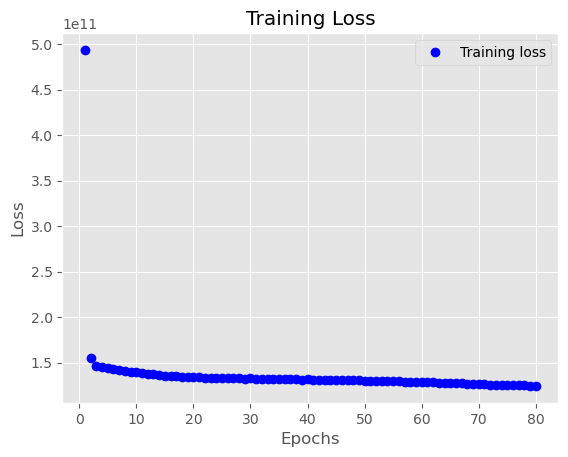

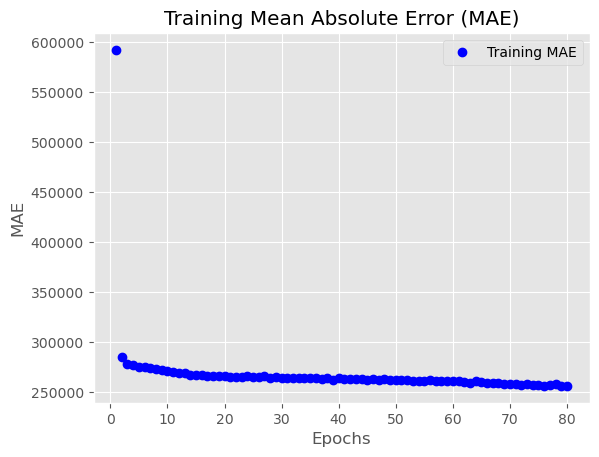

47/47 [==============================] - 3s 66ms/step - loss: 120915632128.0000 - mae: 249180.0156 - mse: 120915632128.0000


In [43]:
# ===== COMPLETAR =====
# Grafica tu función de pérdida.

# =====================
loss = history.history['loss']
mae = history.history['mae']

epochs = range(1, len(loss) + 1)

# Gráfico de pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfico de métrica (MAE)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.title('Training Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

loss, mae, mse = model.evaluate(X_test, y_test)






In [95]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
#código de clases
y_pred = np.mean(y_pred, axis=1)
sum = 0
for i in range(len(y_test)):
    sum += abs(y_test[i]-y_pred[i])/y_test[i]
a = sum/len(y_test)
print('Accuracy is:', 100 - a*100)
print("Loss is: ",loss)
print("MAE is:",mae)
print("MSE is:", mse)


47/47 [==============================] - 3s 65ms/step
Accuracy is: 55.5196042446178
Loss is:  120915632128.0
MAE is: 216567.29145598516
MSE is: 86816002020.92746


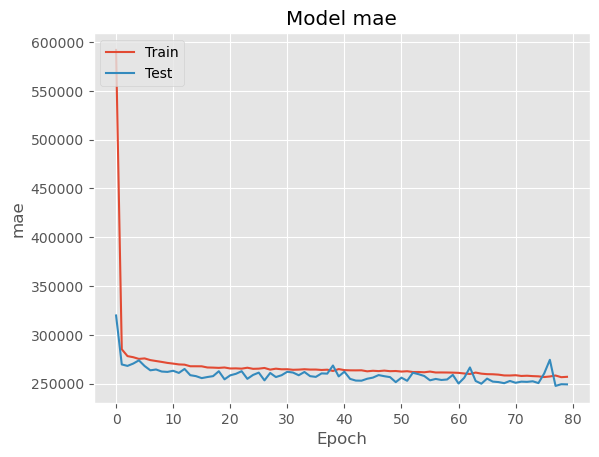

In [45]:
plt.plot(history.history['mae']) 
plt.plot(history.history['val_mae']) 
plt.title('Model mae') 
plt.ylabel('mae') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

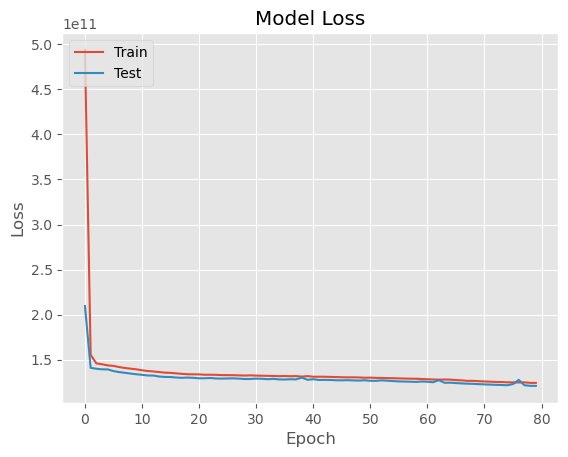

In [46]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

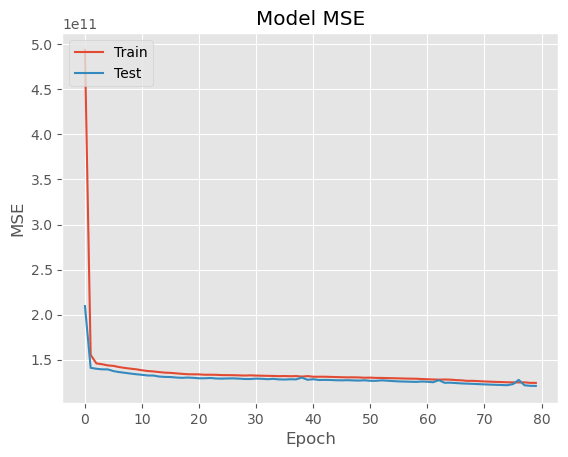

In [47]:
plt.plot(history.history['mse']) 
plt.plot(history.history['val_mse']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

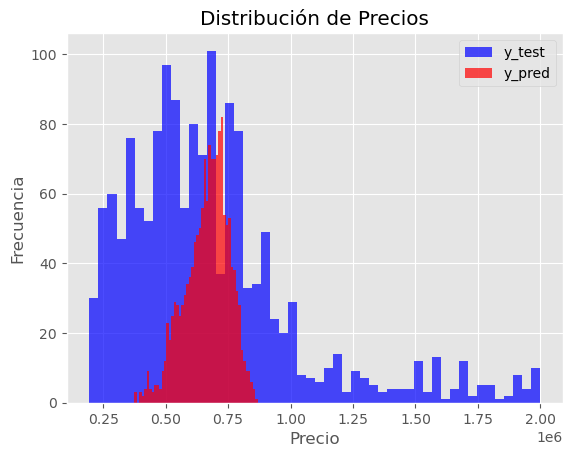

Media y_test: 679828.25
Mediana y_test: 613000.00
Desviación Estándar y_test: 354172.96
Media y_pred: 665860.88
Mediana y_pred: 678629.19
Desviación Estándar y_pred: 87807.57


In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y_test, bins=50, color='blue', alpha=0.7, label='y_test')



plt.hist(y_pred, bins=50, color="red", alpha=0.7, label='y_pred')


plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')


plt.legend()

plt.show()

media_precio = np.mean(y_test)
mediana_precio = np.median(y_test)
std_precio = np.std(y_test)

print(f'Media y_test: {media_precio:.2f}')
print(f'Mediana y_test: {mediana_precio:.2f}')
print(f'Desviación Estándar y_test: {std_precio:.2f}')


media_precio_pred = np.mean(y_pred)
mediana_precio_pred = np.median(y_pred)
std_precio_pred = np.std(y_pred)

print(f'Media y_pred: {media_precio_pred:.2f}')
print(f'Mediana y_pred: {mediana_precio_pred:.2f}')
print(f'Desviación Estándar y_pred: {std_precio_pred:.2f}')


In [69]:
y_pred.shape

(1503,)

In [73]:
y_test[1]

685000

In [72]:
y_pred[1]

578986.4

###Comparación de modelos
A continuación, responde las siguientes preguntas relacionadas a comparar ambos tipos de redes neuronales:

* ¿Cuál de los modelos tiene un mejor *accuracy*?

* ¿Qué rangos de precios tienen un mejor rendimiento? ¿Y cuáles el peor? ¿Depende del modelo?